!pip install numpy matplotlib torch scipy torchvision

In [6]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

from IPython.display import HTML
%matplotlib inline

# Intro to Neural Networks

In [7]:
# PyTorch

In [31]:
y = torch.tensor([1.]) # actual output
x = torch.tensor([0.8]) # input
x

tensor([0.8000])

## Model (One node neural network)

In [32]:
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=1, bias=True)
)

In [33]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(linear_layer.bias.item())
print(linear_layer.weight.item())

print(x*linear_layer.weight.item() + linear_layer.bias.item()) # predicted output right now: y_0

-0.7938050031661987
-0.34498703479766846
tensor([-1.0698])


In [44]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(linear_layer.bias.item())
print(linear_layer.weight.item())

print(x*linear_layer.weight.item() + linear_layer.bias.item()) # predicted output right now: y_0

0.5309808850288391
0.5859768390655518
tensor([0.9998])


In [34]:
y_pred = model(x)
y_pred

tensor([-1.0698], grad_fn=<ViewBackward0>)

## Mean square error loss

In [35]:
loss_fn_mse = torch.nn.MSELoss(reduction='mean')

In [36]:
loss = loss_fn_mse(y_pred, y)
loss

tensor(4.2840, grad_fn=<MseLossBackward0>)

In [37]:
((y_pred-y)**2)

tensor([4.2840], grad_fn=<PowBackward0>)

## L1 error

In [38]:
loss_fn_L1 = torch.nn.L1Loss()

In [39]:
loss = loss_fn_L1(y_pred, y)
loss

tensor(2.0698, grad_fn=<MeanBackward0>)

In [40]:
abs((y_pred-y))

tensor([2.0698], grad_fn=<AbsBackward0>)

## Compute Loss

In [41]:
model.zero_grad()
loss.backward()

In [42]:
for param in model.parameters():
   print(f'Gradient: {param.grad[0]}')

Gradient: tensor([-0.8000])
Gradient: -1.0


## Simulating a neural network

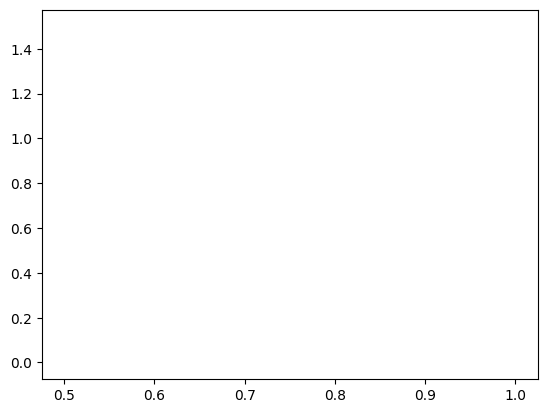

In [43]:
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=1, bias=True)
)
y_pred = model(x)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Set up animation figure
fig, ax = plt.subplots()
line, = ax.plot([0.5, 1], [0, 1.5], lw=2)

# Initialize empty lists to store points for animation
x_points = deque([x.numpy()]*2)
y_points = deque([y_pred.detach().numpy()]*2)

# Define the update function for the animation
def update(frame):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    
    x_points.append(x.numpy())
    y_points.append(output.detach().numpy())

    x_points.popleft()
    y_points.popleft()
    
    line.set_data(x_points, y_points)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=20, blit=True)
HTML(ani.to_jshtml())

## Exercises

- Go over the python notebook and make sure you understand all the steps and the functions we used. Go over the calculations with pen and paper. That is the best way to understand ML.
- We did the ML training with one point (x=0.8, y=1). Repeat training but now consider an additional point at (x=1, y=1.2). What line (y = ax+b) passes through both these points? Does the neural network find the same coefficients (a, b) as you expect?